# Основные статистики

- [Описательные статистики](#desc)
- [Корреляционная матрица](#corr)
- [Подбор закона распределения](#fit)
- [Критерии Стьюдента сравнения средних](#test)


---

## Описательные статистики <a id="desc"></a>

Приведенная ниже таблица демонстрирует некоторые описательные статистики для итогового балла.

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew

df = pd.read_csv("../data/student_perfomance_sample.csv")
score = df["final_exam_score"].dropna()

n = score.count()
mean = score.mean()
median = score.median()
xmin = score.min()
xmax = score.max()
q1 = score.quantile(0.25)
q3 = score.quantile(0.75)
range_ = xmax - xmin
iqr = q3 - q1
std = score.std()
cv = std / mean * 100
skewness = skew(score)

descriptive_stats = pd.DataFrame({
    "Показатель": [
        "N (кол-во наблюдений)",
        "Среднее",
        "Медиана",
        "Минимум",
        "Максимум",
        "Нижний квартиль",
        "Верхний квартиль",
        "Размах",
        "Квартильный размах",
        "Стандартное отклонение",
        "Коэффициент вариации",
        "Асимметрия"
    ],
    "Значение": [
        n, mean, median, xmin, xmax, q1, q3,
        range_, iqr, std, cv, skewness
    ]
})
descriptive_stats

,Показатель,Значение
0,N (кол-во наблюдений),944.000000
1,Среднее,67.200212
2,Медиана,67.000000
3,Минимум,57.000000
4,Максимум,94.000000
5,Нижний квартиль,65.000000
6,Верхний квартиль,70.000000
7,Размах,37.000000
8,Квартильный размах,5.000000
9,Стандартное отклонение,3.763017


В таблице представлены следующие статистики: число наблюдений - 944, среднее - 67,20, медиана - 67,00, минимум - 57,00, максимум - 94,00, нижняя квартиль - 65,00, верхняя квартиль - 70,00, размах - 37,00, квартиль размах - 5,00, стандартное отклонение - 3,76, коэффициент вариации - 5,60, стандартные ошибки - 0,12, асимметрия - 0,96.

Из данных таблицы можно сделать следующие выводы: распределение итогового балла ближе к симметричному, на что указывают близость медианы и среднего значений и небольшая асимметрия; коэффициент вариации невысок, что указывает на относительно однородную выборку; асимметрия положительна, что указывает на небольшой перекос распределения в сторону больших значений итогового балла; основная часть итогового балла расположена между 65 и 70.

## Корреляционная матрица <a id="corr"></a>

В представленной ниже таблице представлена квадратная корреляционная матрица для всех не категориальных переменных.

In [4]:
from scipy.stats import pearsonr

var = ["study_hours_week", "attendance_pct", "sleep_hours", "prev_exam_score", "tutoring_sessions_month", "physical_activity_hours", "final_exam_score"]

corr_matrix = pd.DataFrame(index=var, columns=var, dtype=float)
p_matrix = pd.DataFrame(index=var, columns=var, dtype=float)

for i in var:
    for j in var:
        r, p = pearsonr(df[i].dropna(), df[j].dropna())
        corr_matrix.loc[i, j] = r
        p_matrix.loc[i, j] = p

corr_matrix = corr_matrix.style.apply(lambda row: ['color: red; font-weight: bold' if p_matrix.loc[row.name, col] < 0.05 and abs(row[col]) < 0.99 else '' for col in corr_matrix.columns], axis=1).format("{:.3f}")
corr_matrix

,study_hours_week,attendance_pct,sleep_hours,prev_exam_score,tutoring_sessions_month,physical_activity_hours,final_exam_score
study_hours_week,1.000,-0.007,-0.057,0.028,-0.044,0.032,0.463
attendance_pct,-0.007,1.000,-0.045,-0.020,0.004,-0.026,0.605
sleep_hours,-0.057,-0.045,1.000,-0.031,-0.003,0.026,-0.069
prev_exam_score,0.028,-0.020,-0.031,1.000,-0.017,0.001,0.153
tutoring_sessions_month,-0.044,0.004,-0.003,-0.017,1.000,0.070,0.136
physical_activity_hours,0.032,-0.026,0.026,0.001,0.070,1.000,0.012
final_exam_score,0.463,0.605,-0.069,0.153,0.136,0.012,1.000


Из таблицы наблюдается отсутствие сильной корреляции между рассматриваемыми величинами; наблюдается умеренная корреляция между итоговым баллом и количеством часов, потраченных в неделю на учебу, а также итоговым баллом и процентом посещенных занятий; в остальных случаях наблюдается слабая корреляция. Красным отмечены корреляции, значимые на уровне p < 0,05 – статистически значимые взаимосвязи.

## Подбор закона распределения <a id="fit"></a>

Подбор закона распределения предназначен для определения соответствия закона распределения некой величины заданному. Нулевая гипотеза при этом формулируется так: закон распределения соответствует проверяемому распределению. Проверим распределение переменной Часы учебы/нед на нормальное распределение: на рисунке ниже представлена кривая теоретического закона распределения и гистограмма эмпирического. Поскольку уровень значимости p < 0,05, то отвергается гипотеза о соответствии закона распределения нормальному.

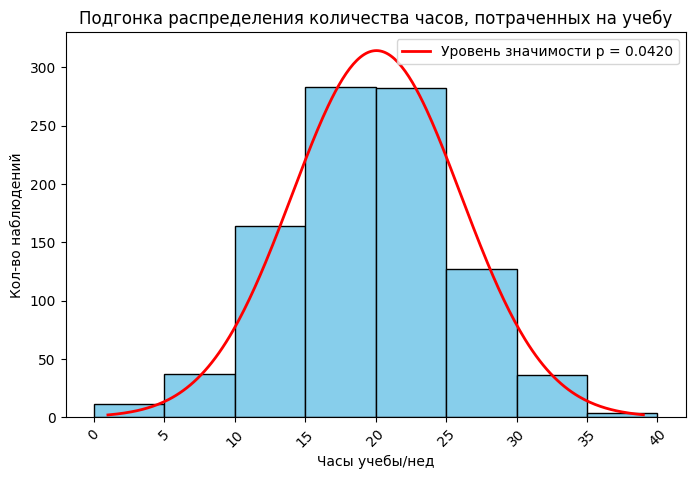

In [61]:
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

data = df["study_hours_week"].dropna()

mu, sigma = norm.fit(data)   
stat, p_value = shapiro(data)
x = np.linspace(min(data), max(data), 300)
bins = np.arange(0, 45, 5)
pdf = norm.pdf(x, mu, sigma)
count = pd.cut(data, bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1], count.values, width=5, align="edge", edgecolor="black", color="skyblue")
plt.plot(x, len(data) * 5 * pdf, linewidth=2, color="red", label=f"Уровень значимости p = {p_value:.4f}")
plt.xticks(bins, rotation=45)
plt.xlabel("Часы учебы/нед")
plt.ylabel("Кол-во наблюдений")
plt.title("Подгонка распределения количества часов, потраченных на учебу")
plt.legend(loc="upper right")
plt.show()

Рассматривая переменную Часы учебы/нед только для типа школы “частная”, можно установить, что эта величина статистически значимо соответствует нормальному закону распределения, что демонстрирует рисунок ниже.

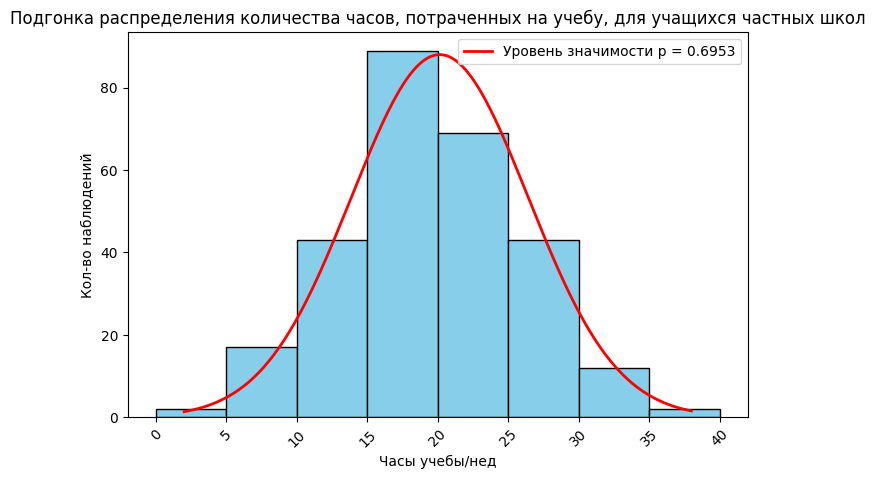

In [70]:
data_private = df.loc[df["school_type"] == "Private", "study_hours_week"].dropna()

mu, sigma = norm.fit(data_private)   
stat, p_value = shapiro(data_private)
x = np.linspace(min(data_private), max(data_private), 300)
bins = np.arange(0, 45, 5)
pdf = norm.pdf(x, mu, sigma)
count = pd.cut(data_private, bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1], count.values, width=5, align="edge", edgecolor="black", color="skyblue")
plt.plot(x, len(data_private) * 5 * pdf, linewidth=2, color="red", label=f"Уровень значимости p = {p_value:.4f}")
plt.xticks(bins, rotation=45)
plt.xlabel("Часы учебы/нед")
plt.ylabel("Кол-во наблюдений")
plt.title("Подгонка распределения количества часов, потраченных на учебу, для учащихся частных школ")
plt.legend(loc="upper right")
plt.show()

Теперь проверим приближение эмпирического дискретного распределения переменной Занятия с реп. пуассоновским. На рисунке ниже изображена гистограмма – график эмпирической плотности распределения – и обозначим красной линией кривую предполагаемого теоретического распределения. λ = 1,49 указывает на среднее количество занятий с репетитором за месяц.

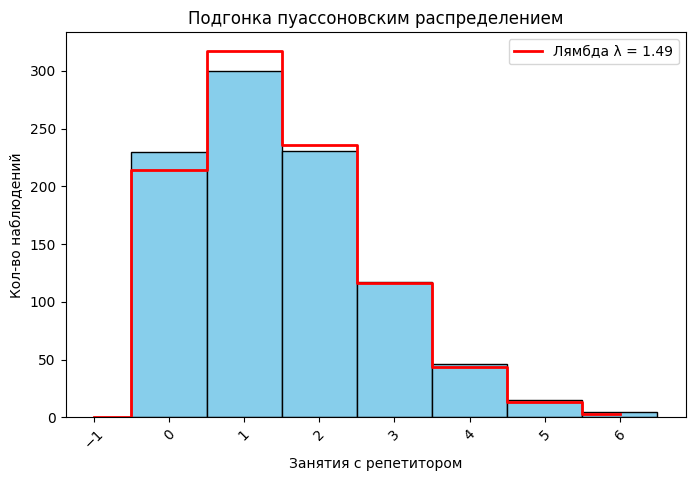

In [116]:
from scipy.stats import poisson

data = df["tutoring_sessions_month"].dropna()
lambda_hat = data.mean()
x = np.arange(data.min() - 1, data.max() + 1)
poisson_probs = poisson.pmf(x, lambda_hat)
bins = np.arange(-1, 7, 1)
count = pd.cut(data, bins=bins, right=True, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(bins[:-1] + 0.5, count.values, width=1, align="edge", edgecolor="black", color="skyblue")
plt.step(x, poisson_probs * len(data), where="mid", color="red", linewidth=2, label=f"Лямбда λ = {lambda_hat:.2f}")
plt.xticks(bins, rotation=45)
plt.xlabel("Занятия с репетитором")
plt.ylabel("Кол-во наблюдений")
plt.title("Подгонка пуассоновским распределением")
plt.legend()
plt.show()